## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

## Import Data

Dataset url: https://github.com/abhijitchak103/heart_attack_risk/blob/main/data/data.csv

In [2]:
url = 'data/data.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head().T

,0,1,2,3,4
Patient ID,RDG0550,NMA3851,TUI5807,YYT5016,ZAC5937
Age,33,56,19,50,89
Sex,Male,Female,Female,Female,Female
Cholesterol,200,262,140,163,144
Blood Pressure,129/90,159/105,161/109,120/62,153/110
Heart Rate,48,46,54,53,92
Diabetes,0,1,0,0,1
Family History,1,0,1,1,0
Smoking,1,1,0,1,1
Obesity,1,0,0,1,0


## Data Description

The features for preparing the predictors:

- `Patient ID`: Unique identifier for each patienttack risk (1: Yes, 0: No)ack risk (1: Yes, 0: No)

- `Age`: Age of the patient

- `Sex`: Gender of the patient (Male/Female)

- `Cholesterol`: Cholesterol levels of the patient

- `Blood Pressure`: Blood pressure of the patient (systolic/diastolic)  

- `Heart Rate`: Heart rate of the patient

- `Diabetes`: Whether the patient has diabetes (Yes/No)

- `Family History`: Family history of heart-related problems (1: Yes, 0: No)

- `Smoking`: Smoking status of the patient (1: Smoker, 0: Non-smoker)

- `Obesity`: Obesity status of the patient (1: Obese, 0: Not obese)

- `Alcohol Consumption`: Patient consumes alcohol (Yes/No)

- `Exercise Hours Per Week`: Number of exercise hours per week

- `Diet`: Dietary habits of the patient (Healthy/Average/Unhealthy)

- `Previous Heart Problems`: Previous heart problems of the patient (1: Yes, 0: No)

- `Medication Use`: Medication usage by the patient (1: Yes, 0: No)

- `Stress Level`: Stress level reported by the patient (1-10)

- `Sedentary Hours Per Day`: Hours of sedentary activity per day

- `Income`: Income level of the patient

- `BMI`: Body Mass Index (BMI) of the patient

- `Triglycerides`: Triglyceride levels of the patient

- `Physical Activity Days Per Week`: Days of physical activity per week

- `Sleep Hours Per Day`: Hours of sleep per day

- `Country`: Country of the patient

- `Continent`: Continent where the patient resides

- `Hemisphere`: Hemisphere where the patient resides

Target Feature:

`Heart Attack Risk`: Presence of heart attack risk (1: Yes, 0: No)

## Data Preparation

- Rename Columns to remove spaces and capital letters
- Lowercase string entries in rows and replace spaces with underscores
- Convert numeric categoric entries to stings

In [5]:
df.columns = df.columns.str.replace(" ", '_').str.lower()

In [6]:
categorical = [x for x in df.columns if df[x].dtype == 'O']

In [7]:
for c in categorical:
    df[c] = df[c].str.replace(" ", '_').str.lower()

In [8]:
df.head().T

,0,1,2,3,4
patient_id,rdg0550,nma3851,tui5807,yyt5016,zac5937
age,33,56,19,50,89
sex,male,female,female,female,female
cholesterol,200,262,140,163,144
blood_pressure,129/90,159/105,161/109,120/62,153/110
heart_rate,48,46,54,53,92
diabetes,0,1,0,0,1
family_history,1,0,1,1,0
smoking,1,1,0,1,1
obesity,1,0,0,1,0


In [9]:
df.diabetes.value_counts()

diabetes
1    4576
0    2434
Name: count, dtype: int64

In [10]:
# Diabetes: Whether the patient has diabetes (Yes/No)

diabetes_values = {
    0: 'yes',
    1: 'no'
}
df.diabetes = df.diabetes.map(diabetes_values)
df.diabetes.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: diabetes, dtype: object

In [11]:
df.family_history.value_counts()

family_history
0    3562
1    3448
Name: count, dtype: int64

In [12]:
# Family History: Family history of heart-related problems (1: Yes, 0: No)

family_values = {
    1: 'yes',
    0: 'no'
}
df.family_history = df.family_history.map(family_values)
df.family_history.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: family_history, dtype: object

In [13]:
df.smoking.value_counts()

smoking
1    6283
0     727
Name: count, dtype: int64

In [14]:
# Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)

smoking_values = {
    1: 'yes',
    0: 'no'
}
df.smoking = df.smoking.map(smoking_values)
df.smoking.head()

0    yes
1    yes
2     no
3    yes
4    yes
Name: smoking, dtype: object

In [15]:
df.obesity.value_counts()

obesity
0    3506
1    3504
Name: count, dtype: int64

In [16]:
# Obesity: Obesity status of the patient (1: Obese, 0: Not obese)

obesity_values = {
    1: 'yes',
    0: 'no'
}
df.obesity = df.obesity.map(obesity_values)
df.obesity.head()

0    yes
1     no
2     no
3    yes
4     no
Name: obesity, dtype: object

In [17]:
df.alcohol_consumption.value_counts()

alcohol_consumption
1    4177
0    2833
Name: count, dtype: int64

In [18]:
# Alcohol Consumption: Patient consumes alcohol (Yes/No)

alcohol_values = {
    1: 'yes',
    0: 'no'
}

df.alcohol_consumption = df.alcohol_consumption.map(alcohol_values)
df.alcohol_consumption.head()

0    yes
1     no
2    yes
3    yes
4    yes
Name: alcohol_consumption, dtype: object

In [19]:
df.previous_heart_problems.value_counts()

previous_heart_problems
0    3518
1    3492
Name: count, dtype: int64

In [20]:
# Previous Heart Problems: Previous heart problems of the patient (1: Yes, 0: No)

values = {
    1: 'yes',
    0: 'no'
}
df.previous_heart_problems = df.previous_heart_problems.map(values)
df.previous_heart_problems.head()

0     no
1    yes
2    yes
3     no
4    yes
Name: previous_heart_problems, dtype: object

In [21]:
df.medication_use.value_counts()

medication_use
1    3506
0    3504
Name: count, dtype: int64

In [22]:
# Medication Use: Medication usage by the patient (1: Yes, 0: No)

values = {
    1: 'yes',
    0: 'no'
}
df.medication_use = df.medication_use.map(values)
df.medication_use.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: medication_use, dtype: object

In [23]:
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
dtype: int64

We do not have null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       7010 non-null   object 
 1   age                              7010 non-null   int64  
 2   sex                              7010 non-null   object 
 3   cholesterol                      7010 non-null   int64  
 4   blood_pressure                   7010 non-null   object 
 5   heart_rate                       7010 non-null   int64  
 6   diabetes                         7010 non-null   object 
 7   family_history                   7010 non-null   object 
 8   smoking                          7010 non-null   object 
 9   obesity                          7010 non-null   object 
 10  alcohol_consumption              7010 non-null   object 
 11  exercise_hours_per_week          7010 non-null   float64
 12  diet                

We see that `blood_pressure` is of type `object` whereas it should be `numeric`. We can correct it by splitting the `systolic` and `diastolic` to different columns.

In [25]:
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)

In [26]:
df.head(2)

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_bp,diastolic_bp
0,rdg0550,33,male,200,129/90,48,yes,yes,yes,yes,...,30.449815,63,6,7,argentina,south_america,southern_hemisphere,1,129,90
1,nma3851,56,female,262,159/105,46,no,no,yes,no,...,34.973685,333,7,8,nigeria,africa,northern_hemisphere,1,159,105


In [27]:
df.drop(columns = 'blood_pressure', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       7010 non-null   object 
 1   age                              7010 non-null   int64  
 2   sex                              7010 non-null   object 
 3   cholesterol                      7010 non-null   int64  
 4   heart_rate                       7010 non-null   int64  
 5   diabetes                         7010 non-null   object 
 6   family_history                   7010 non-null   object 
 7   smoking                          7010 non-null   object 
 8   obesity                          7010 non-null   object 
 9   alcohol_consumption              7010 non-null   object 
 10  exercise_hours_per_week          7010 non-null   float64
 11  diet                             7010 non-null   object 
 12  previous_heart_probl

We can get a fairly good idea about `continent` and `hemisphere` from `country`. So we can drop the two features. Also, we can drop `patient_id`.

In [29]:
df.drop(columns = ['continent', 'hemisphere', 'patient_id'], inplace=True)

We can also rename `sex` to `gender`

In [30]:
df.rename(columns = {'sex': 'gender'}, inplace=True)

In [31]:
categorical = [x for x in df.columns if df[x].dtype == 'O']
numerical = [x for x in df.columns if x not in categorical]

assert len(categorical) + len(numerical) == len(df.columns)

## Setting up Validation Framework

In [172]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=12)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=12)

In [173]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [174]:
y_train = df_train.heart_attack_risk.values
y_val = df_val.heart_attack_risk.values
y_test = df_test.heart_attack_risk.values

In [175]:
del df_train['heart_attack_risk']
del df_val['heart_attack_risk']
del df_test['heart_attack_risk']

In [36]:
len(df_train), len(df_val), len(df_test)

(4206, 1402, 1402)

In [37]:
len(y_train), len(y_val), len(y_test)

(4206, 1402, 1402)

## Exploratory Data Analysis

- Mising Values
- Distribution of Target Variable
- Feature Importance - Mutual Inforamtion
- Feature Importance - Correlation

In [38]:
df_full_train = df_full_train.reset_index(drop=True)

In [39]:
df_full_train.isnull().sum()

age                                0
gender                             0
cholesterol                        0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
heart_attack_risk                  0
systolic_bp                        0
diastolic_bp                       0
dtype: int64

In [40]:
df_full_train.heart_attack_risk.value_counts(normalize=True)

heart_attack_risk
0    0.643723
1    0.356277
Name: proportion, dtype: float64

We can calculate the global heart attack risk rate. `Global` here refers to the entire dataset.

In [41]:
global_heart_attack_risk_rate = df_full_train.heart_attack_risk.mean()
round(global_heart_attack_risk_rate, 4)

0.3563

In [42]:
numerical.remove('heart_attack_risk')
numerical

['age',
 'cholesterol',
 'heart_rate',
 'exercise_hours_per_week',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'systolic_bp',
 'diastolic_bp']

### Feature Importance - Risk and Rate

We can check the risk among individual groups now and see how groups influence the risk rate.

In [43]:
df_full_train[categorical].nunique()

gender                      2
diabetes                    2
family_history              2
smoking                     2
obesity                     2
alcohol_consumption         2
diet                        3
previous_heart_problems     2
medication_use              2
country                    20
dtype: int64

In [44]:
from IPython.display import display

In [45]:
categories = categorical.copy()
categories.remove('country')
for c in categories:
    print(c)
    df_group = df_full_train.groupby(c).heart_attack_risk.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_attack_risk_rate
    df_group['risk'] = df_group['mean'] / global_heart_attack_risk_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.356246,1673,-0.000030,0.999914
male,0.356290,3935,0.000013,1.000036



diabetes


,mean,count,diff,risk
diabetes,,,,
no,0.365574,3660,0.009297,1.026095
yes,0.338809,1948,-0.017468,0.950972



family_history


,mean,count,diff,risk
family_history,,,,
no,0.360169,2832,0.003893,1.010926
yes,0.352305,2776,-0.003971,0.988853



smoking


,mean,count,diff,risk
smoking,,,,
no,0.368696,575,0.012419,1.034857
yes,0.354858,5033,-0.001419,0.996018



obesity


,mean,count,diff,risk
obesity,,,,
no,0.361279,2815,0.005002,1.014040
yes,0.351235,2793,-0.005042,0.985849



alcohol_consumption


,mean,count,diff,risk
alcohol_consumption,,,,
no,0.361617,2251,0.005340,1.014989
yes,0.352696,3357,-0.003581,0.989949



diet


,mean,count,diff,risk
diet,,,,
average,0.349232,1887,-0.007045,0.980226
healthy,0.360483,1903,0.004207,1.011807
unhealthy,0.359186,1818,0.002909,1.008165



previous_heart_problems


,mean,count,diff,risk
previous_heart_problems,,,,
no,0.353191,2820,-0.003085,0.991340
yes,0.359397,2788,0.003121,1.008759



medication_use


,mean,count,diff,risk
medication_use,,,,
no,0.356836,2794,0.000559,1.001570
yes,0.355721,2814,-0.000555,0.998441


We cannot clearly see a demarcation on which group influences the risk of heart attacks among the various categorical features.

### Feature Importance - Mutual Information

`Mutual Information` measures how much information we can gather by studying another variable.

In [46]:
def mutual_score(series):
    return mutual_info_score(series, df_full_train.heart_attack_risk)

In [47]:
mi = df_full_train[categorical].apply(mutual_score)
mi_sorted = mi.sort_values(ascending=False)

In [48]:
mi_5 = mi_sorted.index[:5]
mi_5

Index(['country', 'diabetes', 'diet', 'obesity', 'alcohol_consumption'], dtype='object')

The top 5 categorical features for providing information about `heart attack risk` are:
`country`, `diabetes`, `diet`, `obesity` and `alcohol_consumption`

### Feature Importance - Correlation

For numerical features, we can use correlation values.

In [49]:
corr = df_full_train[numerical].corrwith(df_full_train.heart_attack_risk).abs()
corr_sorted = corr.sort_values(ascending=False)

In [50]:
corr_sorted

cholesterol                        0.032426
systolic_bp                        0.021046
sleep_hours_per_day                0.019914
triglycerides                      0.019216
income                             0.014124
age                                0.010623
physical_activity_days_per_week    0.007483
bmi                                0.006868
stress_level                       0.004424
sedentary_hours_per_day            0.004416
exercise_hours_per_week            0.004354
diastolic_bp                       0.003259
heart_rate                         0.000885
dtype: float64

In [51]:
corr_5 = corr_sorted.index[:5]
corr_5

Index(['cholesterol', 'systolic_bp', 'sleep_hours_per_day', 'triglycerides',
       'income'],
      dtype='object')

The top 5 numerical features for providing information about `heart attack risk` are:
`cholesterol`, `systolic_bp`, `sleep_hours_per_day`, `triglycerides` and `income`

## Encoding Variables

In [52]:
dv = DictVectorizer(sparse=False)

In [53]:
features_top_10 = list(corr_5) + list(mi_5)

In [54]:
# Training with Top 5 features of Categorical and Numerical

train_dicts_10 = df_train[features_top_10].to_dict(orient='records')
X_train_10 = dv.fit_transform(train_dicts_10)

val_dicts_10 = df_val[features_top_10].to_dict(orient='records')
X_val_10 = dv.transform(val_dicts_10)

In [55]:
# Training all the features

train_dicts = df_train[categorical +numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic Regression

In [56]:
score = {}

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train_10, y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict_proba(X_val_10)[:, 1]

In [60]:
score['log_reg_10'] = roc_auc_score(y_val, y_pred)
score['log_reg_10']

0.46926453707357313

In [61]:
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_val)[:, 1]

In [62]:
score['log_reg'] = roc_auc_score(y_val, y_pred)
score['log_reg']

0.48578128923485303

The model with full set of features does around 2% better than only selected features

### Tuning Logistic Regression Model

- Solvers

In [63]:
solvers = ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'lbfgs']

In [64]:
for s in solvers:
    lr = LogisticRegression(solver=s)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'solver: {s} --> auc: {auc}')
    if auc > score['log_reg']:
        score['log_reg'] = auc    

solver: liblinear --> auc: 0.4840594396814578
solver: newton-cg --> auc: 0.5026545180614843
solver: newton-cholesky --> auc: 0.5028159414571152
solver: sag --> auc: 0.49768178067941315
solver: saga --> auc: 0.5002398931018402
solver: lbfgs --> auc: 0.48578128923485303


So, the `newton-cholesky` does the best in increasing auc scores.

We can try, with using `None` penalty as by default `l2` is being used.

In [65]:
for p in ['l2', None]:
    lr = LogisticRegression(solver='newton-cholesky', penalty=p)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'penalty: {p} --> auc: {auc}')
    if auc > score['log_reg']:
        score['log_reg'] = auc

penalty: l2 --> auc: 0.5028159414571152
penalty: None --> auc: 0.5057036266456219


### Logistic Regression with Feature Scaling

In [66]:
def scale_numeric(df_in, numeric_features, categoric_features, scaler = StandardScaler()):
    numeric_df = df_in[numeric_features]
    categoric_df = df_in[categoric_features]
    train_data = scaler.fit(numeric_df)
    train_data = scaler.transform(numeric_df)
    numeric_df = pd.DataFrame(train_data, columns = numeric_features)
    df_out = pd.concat([numeric_df, categoric_df], axis=1)
    return df_out, scaler

In [67]:
df_train_scale, scaler = scale_numeric(df_train, numerical, categorical)

In [68]:
def scale_val(df_in, numeric_features, categoric_features, scaler):
    numeric_df = df_in[numeric_features]
    categoric_df = df_in[categoric_features]
    numeric_df = pd.DataFrame(scaler.transform(numeric_df), columns = numeric_features)
    df_out = pd.concat([numeric_df, categoric_df], axis=1)
    return df_out

In [69]:
df_val_scale = scale_val(df_val, numerical, categorical, scaler)

In [70]:
dv = DictVectorizer(sparse=False)
train_dicts_scale = df_train_scale[categorical +numerical].to_dict(orient='records')
X_train_scale = dv.fit_transform(train_dicts_scale)

val_dicts_scale = df_val_scale[categorical + numerical].to_dict(orient='records')
X_val_scale = dv.transform(val_dicts_scale)

In [71]:
lr = LogisticRegression(solver='newton-cholesky', penalty='l2')

In [72]:
lr.fit(X_train_scale, y_train)
y_pred = lr.predict_proba(X_val_scale)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.5027800695914195

Feature Scaling does not improve the model performance. So we stick with the data without Scaling.

- `C`

In [73]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    lr =  LogisticRegression(C=c, solver='newton-cholesky', penalty='l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred)
    print(f"C: {c:>4},Train auc: {round(auc_train, 3)}, Val auc: {round(auc_val, 3)}")

C: 0.001,Train auc: 0.541, Val auc: 0.515
C: 0.01,Train auc: 0.551, Val auc: 0.501
C:  0.1,Train auc: 0.554, Val auc: 0.502
C:    1,Train auc: 0.555, Val auc: 0.503
C:   10,Train auc: 0.554, Val auc: 0.503
C:  100,Train auc: 0.514, Val auc: 0.506
C: 1000,Train auc: 0.514, Val auc: 0.506


- `max_iter`

In [74]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    print()
    print(f"C={c}")
    for m in [10, 100, 1000, 10000, 100000]:
        lr =  LogisticRegression(C=c, solver='newton-cholesky', penalty='l2', max_iter=m)
        lr.fit(X_train, y_train)
        y_pred = lr.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred)
        y_pred = lr.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, y_pred)
        print(f"Max iterations: {m:>6}, Train auc: {round(auc_train, 3)}, Val auc: {round(auc_val, 3)}")
    print()


C=0.001
Max iterations:     10, Train auc: 0.541, Val auc: 0.515
Max iterations:    100, Train auc: 0.541, Val auc: 0.515
Max iterations:   1000, Train auc: 0.541, Val auc: 0.515
Max iterations:  10000, Train auc: 0.541, Val auc: 0.515
Max iterations: 100000, Train auc: 0.541, Val auc: 0.515


C=0.01
Max iterations:     10, Train auc: 0.551, Val auc: 0.501
Max iterations:    100, Train auc: 0.551, Val auc: 0.501
Max iterations:   1000, Train auc: 0.551, Val auc: 0.501
Max iterations:  10000, Train auc: 0.551, Val auc: 0.501
Max iterations: 100000, Train auc: 0.551, Val auc: 0.501


C=0.1
Max iterations:     10, Train auc: 0.554, Val auc: 0.502
Max iterations:    100, Train auc: 0.554, Val auc: 0.502
Max iterations:   1000, Train auc: 0.554, Val auc: 0.502
Max iterations:  10000, Train auc: 0.554, Val auc: 0.502
Max iterations: 100000, Train auc: 0.554, Val auc: 0.502


C=1
Max iterations:     10, Train auc: 0.555, Val auc: 0.503
Max iterations:    100, Train auc: 0.555, Val auc: 0.503

For `C`=0.001, the model yields the best performance. hence, we fix the Logistic Regression model at:
```python
LogisticRegression(C=0.001, solver='newton-cholesky', penalty='l2', max_iter=10)
```

## Decision Trees

In [75]:
dt_10 = DecisionTreeClassifier()
dt = DecisionTreeClassifier()

In [76]:
dt_10.fit(X_train_10, y_train)
y_pred = dt_10.predict_proba(X_val_10)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.498231068622879

In [77]:
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.48648303260752596

We can see that the Decision Tree with all features work slightly better. We can further tune the model.

## Parameter Tuning for Decision Trees

- `Criterion`: [`gini`, `entropy`, `log_loss`]

In [78]:
criteria = ['gini', 'entropy', 'log_loss']

In [79]:
for c in criteria:
    dt = DecisionTreeClassifier(criterion=c,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Criterion: {c:>8}\t-->\tAUC: {round(auc,4)}")

Criterion:     gini	-->	AUC: 0.4919
Criterion:  entropy	-->	AUC: 0.4905
Criterion: log_loss	-->	AUC: 0.4905


We can stick with `gini` as the criteria.

- `max_depth`: [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, None]

In [80]:
depth = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, None]

In [81]:
for d in depth:
    dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=d,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Max_depth: {d}\t-->\tAUC: {round(auc,4)}")

Max_depth: 1	-->	AUC: 0.4917
Max_depth: 2	-->	AUC: 0.5193
Max_depth: 3	-->	AUC: 0.525
Max_depth: 4	-->	AUC: 0.5286
Max_depth: 5	-->	AUC: 0.5006
Max_depth: 10	-->	AUC: 0.4709
Max_depth: 20	-->	AUC: 0.4874
Max_depth: 30	-->	AUC: 0.498
Max_depth: 40	-->	AUC: 0.4919
Max_depth: 50	-->	AUC: 0.4919
Max_depth: 100	-->	AUC: 0.4919
Max_depth: 200	-->	AUC: 0.4919
Max_depth: None	-->	AUC: 0.4919


`max_depth` = 4

- `min_samples_leaf`: [1, 2, 3, 4, 5, 10]

In [82]:
leaves = [1, 2, 3, 4, 5, 10, 50, 100, 200, 500]

In [83]:
for l in leaves:
    dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                                min_samples_leaf=l,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Min_sampples_leaf: {l:>3}\t-->\tAUC: {round(auc,4)}")

Min_sampples_leaf:   1	-->	AUC: 0.5286
Min_sampples_leaf:   2	-->	AUC: 0.5286
Min_sampples_leaf:   3	-->	AUC: 0.5286
Min_sampples_leaf:   4	-->	AUC: 0.5275
Min_sampples_leaf:   5	-->	AUC: 0.5267
Min_sampples_leaf:  10	-->	AUC: 0.5239
Min_sampples_leaf:  50	-->	AUC: 0.5053
Min_sampples_leaf: 100	-->	AUC: 0.5084
Min_sampples_leaf: 200	-->	AUC: 0.5049
Min_sampples_leaf: 500	-->	AUC: 0.5066


`min_sample_leaf` of 1, 2 and 3 have similar scores. We can go with 2.

Further we can combine and check for combinations of `max_depth` and `min_samples_leaf`.

In [84]:
dt_scores = []
for d in [2,3,4,5,6,7, 8, 9, 10, 20, None]:
    for l in [1,2,3,4,5,10,15,20,30,40,50]:
        dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=d,
                                min_samples_leaf=l,
                                random_state=12)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        dt_scores.append((d, l, round(auc, 4)))
        # print(f"Min_sampples_leaf: {l:>3}\t-->\tAUC: {round(auc,4)}")

df_dt = pd.DataFrame(dt_scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_dt.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
28,4.0,15,0.5329
29,4.0,20,0.5317
22,4.0,1,0.5286
23,4.0,2,0.5286
24,4.0,3,0.5286


In [85]:
dt_pivot = df_dt.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
dt_pivot

max_depth,NaN,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0
min_samples_leaf,,,,,,,,,,,
1,0.4919,0.5193,0.5250,0.5286,0.5006,0.4994,0.5222,0.4677,0.4980,0.4709,0.4874
2,0.4894,0.5193,0.5250,0.5286,0.5006,0.4972,0.5175,0.4698,0.4900,0.4721,0.4725
3,0.4980,0.5193,0.5250,0.5286,0.5006,0.4972,0.5183,0.4694,0.4977,0.4876,0.4765
4,0.4859,0.5193,0.5250,0.5275,0.4917,0.5074,0.5122,0.4806,0.4901,0.4847,0.4869
5,0.4866,0.5193,0.5243,0.5267,0.4951,0.5089,0.5161,0.4801,0.4963,0.4805,0.4909
10,0.4974,0.5193,0.5245,0.5239,0.4974,0.5082,0.5094,0.4974,0.4967,0.4899,0.4974
15,0.5148,0.5193,0.5245,0.5329,0.5010,0.4979,0.4987,0.4833,0.4901,0.4993,0.5148
20,0.5156,0.5193,0.5233,0.5317,0.4992,0.4890,0.5007,0.4892,0.4959,0.4998,0.5156
30,0.4925,0.5193,0.5214,0.5053,0.4846,0.4868,0.4958,0.4840,0.4909,0.4910,0.4925


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

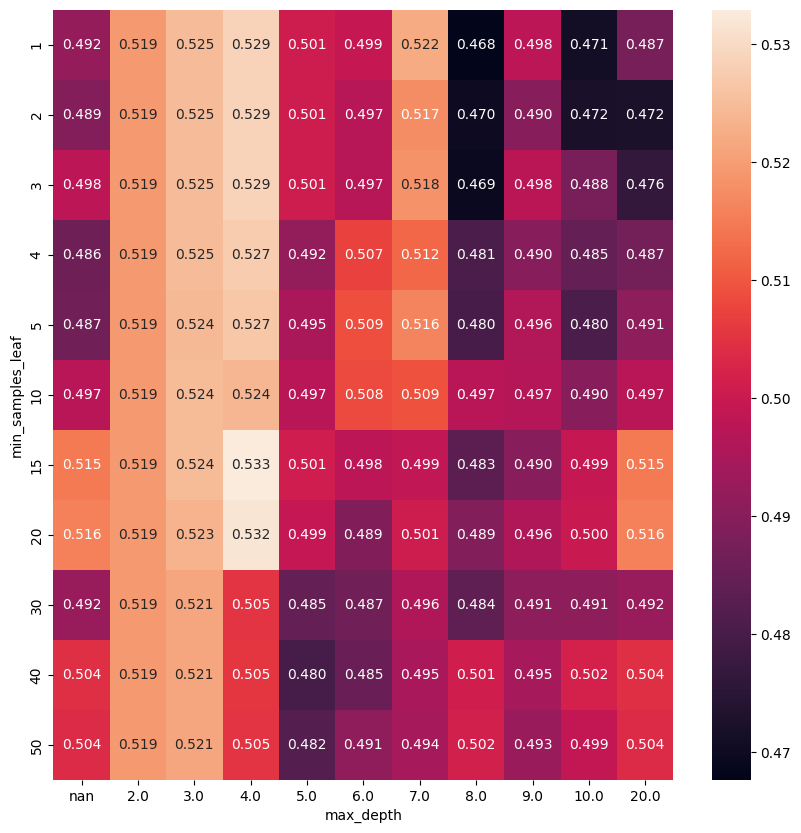

In [86]:
plt.figure(figsize =(10,10))
sns.heatmap(dt_pivot, annot=True, fmt='.3f')

As evident from the heatmap, the `max_depth` of 4 and `min_samples_leaf` of 15 yields the best model out of the ranges tested. We finalize our `DecisionTreeClassifier` model as:

```python
DecisionTreeClassifier(criterion='gini',
                       max_depth=4,
                       min_samples_leaf=15,
                       random_state=12)
```

In [87]:
dt = DecisionTreeClassifier(criterion='gini',
                       max_depth=4,
                       min_samples_leaf=15,
                       random_state=12)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
score['dt'] = auc
print(f"auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")

auc_train: 0.567, auc_val: 0.533


## Random Forest Classifier

In [88]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")

auc_train: 1.0, auc_val: 0.498


### Random Forest Tuning

- `n_estimators`

In [89]:
estimators = range(10, 201, 10)

n_estimators:  10, auc_train: 0.999, auc_val: 0.5
n_estimators:  20, auc_train: 1.0, auc_val: 0.516
n_estimators:  30, auc_train: 1.0, auc_val: 0.512
n_estimators:  40, auc_train: 1.0, auc_val: 0.511
n_estimators:  50, auc_train: 1.0, auc_val: 0.506
n_estimators:  60, auc_train: 1.0, auc_val: 0.505
n_estimators:  70, auc_train: 1.0, auc_val: 0.499
n_estimators:  80, auc_train: 1.0, auc_val: 0.491
n_estimators:  90, auc_train: 1.0, auc_val: 0.49
n_estimators: 100, auc_train: 1.0, auc_val: 0.494
n_estimators: 110, auc_train: 1.0, auc_val: 0.494
n_estimators: 120, auc_train: 1.0, auc_val: 0.496
n_estimators: 130, auc_train: 1.0, auc_val: 0.496
n_estimators: 140, auc_train: 1.0, auc_val: 0.495
n_estimators: 150, auc_train: 1.0, auc_val: 0.492
n_estimators: 160, auc_train: 1.0, auc_val: 0.49
n_estimators: 170, auc_train: 1.0, auc_val: 0.488
n_estimators: 180, auc_train: 1.0, auc_val: 0.487
n_estimators: 190, auc_train: 1.0, auc_val: 0.486
n_estimators: 200, auc_train: 1.0, auc_val: 0.485


,n_estimators,auc
1,20,0.515520
2,30,0.512441
3,40,0.511488
4,50,0.505911
5,60,0.504846
0,10,0.499669
6,70,0.499429
12,130,0.496291
11,120,0.495823
13,140,0.494676


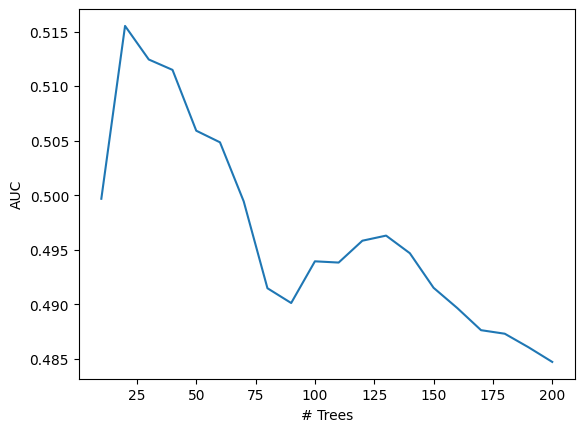

In [90]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"n_estimators: {n:>3}, auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")
    scores_rf.append((n, auc))

df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores.sort_values(by='auc', ascending=False))

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

We can refine the `n_estimators` by magnifying the scope between 10 and 30.

In [91]:
estimators = range(10, 31, 2)

n_estimators:  10, auc_train: 0.999, auc_val: 0.5
n_estimators:  12, auc_train: 1.0, auc_val: 0.507
n_estimators:  14, auc_train: 1.0, auc_val: 0.513
n_estimators:  16, auc_train: 1.0, auc_val: 0.515
n_estimators:  18, auc_train: 1.0, auc_val: 0.512
n_estimators:  20, auc_train: 1.0, auc_val: 0.516
n_estimators:  22, auc_train: 1.0, auc_val: 0.521
n_estimators:  24, auc_train: 1.0, auc_val: 0.519
n_estimators:  26, auc_train: 1.0, auc_val: 0.509
n_estimators:  28, auc_train: 1.0, auc_val: 0.516
n_estimators:  30, auc_train: 1.0, auc_val: 0.512


,n_estimators,auc
0,10,0.499669
1,12,0.507013
2,14,0.513018
3,16,0.515186
4,18,0.511769
5,20,0.515520
6,22,0.520996
7,24,0.519496
8,26,0.508553
9,28,0.515518


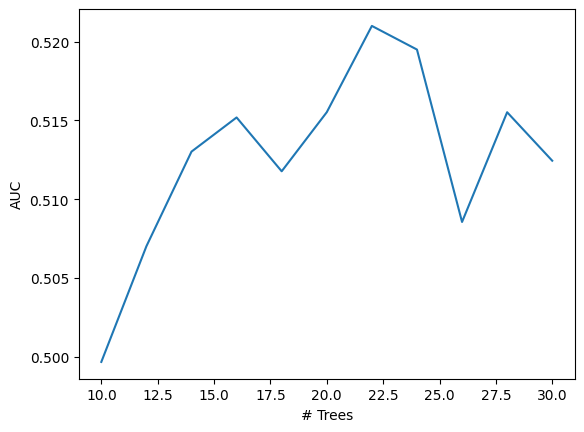

In [92]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"n_estimators: {n:>3}, auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

In [93]:
estimators = range(20, 25, 1)

n_estimators:  20, auc_train: 1.0, auc_val: 0.516
n_estimators:  21, auc_train: 1.0, auc_val: 0.521
n_estimators:  22, auc_train: 1.0, auc_val: 0.521
n_estimators:  23, auc_train: 1.0, auc_val: 0.519
n_estimators:  24, auc_train: 1.0, auc_val: 0.519


,n_estimators,auc
0,20,0.515520
1,21,0.521122
2,22,0.520996
3,23,0.519231
4,24,0.519496


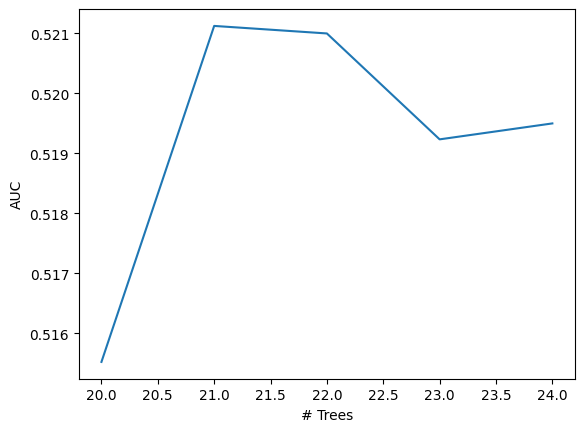

In [94]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"n_estimators: {n:>3}, auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

In [95]:
estimators = range(5, 10, 1)

n_estimators:   5, auc_train: 0.989, auc_val: 0.503
n_estimators:   6, auc_train: 0.994, auc_val: 0.497
n_estimators:   7, auc_train: 0.997, auc_val: 0.493
n_estimators:   8, auc_train: 0.998, auc_val: 0.491
n_estimators:   9, auc_train: 0.999, auc_val: 0.493


,n_estimators,auc
0,5,0.502732
1,6,0.497377
2,7,0.493189
3,8,0.490661
4,9,0.492962


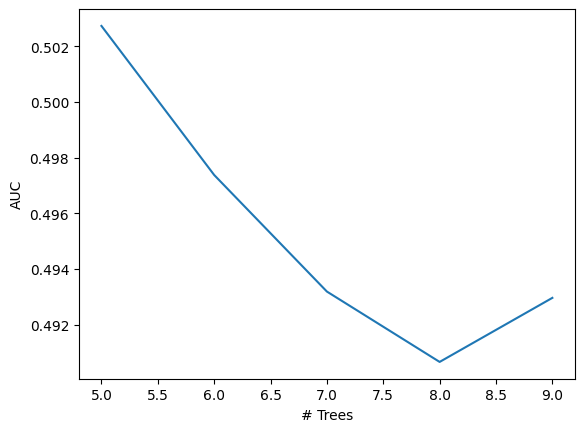

In [96]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"n_estimators: {n:>3}, auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

`n_estimators`: 21

- `max_depth`

In [97]:
depth = [2, 3, 4, 5, 10, 15, 20]

In [98]:
scores_rf = []
for d in depth:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        # print(f"Max_depth: {d:>2}, auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")
        scores_rf.append((d, n, auc_train, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['max_depth', 'n_estimators', 'train_auc', 'val_auc'])
display(df_scores.sort_values(by=['val_auc', 'train_auc'], ascending=False))

,max_depth,n_estimators,train_auc,val_auc
4,2,9,0.572335,0.529714
19,5,9,0.689600,0.521181
3,2,8,0.571409,0.520649
18,5,8,0.676432,0.520077
2,2,7,0.565154,0.517616
17,5,7,0.663955,0.517531
15,5,5,0.628031,0.517044
7,3,7,0.588893,0.516146
13,4,8,0.632323,0.513238
16,5,6,0.642129,0.511396


`max_depth`: 2, `n_estimators`: 9

- `min_sample_leaf`

In [99]:
leaves = [5, 10, 15, 20, 25]

In [100]:
scores_rf = []
for s in leaves:
    rf = RandomForestClassifier(n_estimators=9, 
                                max_depth=2,
                                min_samples_leaf=s,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores_rf.append((s, n, auc_train, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['min_samples_leaf', 'n_estimators', 'train_auc', 'val_auc'])
display(df_scores.sort_values(by=['val_auc', 'train_auc'], ascending=False))

,min_samples_leaf,n_estimators,train_auc,val_auc
3,20,9,0.574744,0.528777
4,25,9,0.574744,0.528777
2,15,9,0.573447,0.528440
0,5,9,0.572480,0.527843
1,10,9,0.572653,0.527452


`min_samples_leaf`: 20

- `max_features`

In [101]:
num_features = list(range(5, len(dv.get_feature_names_out()) + 1, 5)) + [None]

In [102]:
scores_rf = []
for f in num_features:
    rf = RandomForestClassifier(n_estimators=9, 
                                max_depth=2,
                                min_samples_leaf=20,
                                max_features=f,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores_rf.append((f, auc_train, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['max_features', 'train_auc', 'val_auc'])
display(df_scores.sort_values(by=['val_auc', 'train_auc'], ascending=False))

,max_features,train_auc,val_auc
6,35.0,0.576112,0.522156
8,45.0,0.569482,0.518093
10,NaN,0.567835,0.517468
9,50.0,0.567189,0.516620
7,40.0,0.580470,0.516592
1,10.0,0.576143,0.513385
2,15.0,0.572599,0.511531
4,25.0,0.565196,0.508817
0,5.0,0.568028,0.507360
5,30.0,0.580261,0.506070


In [103]:
num_features = range(25, 51, 1)

In [104]:
scores_rf = []
for f in num_features:
    rf = RandomForestClassifier(n_estimators=9, 
                                max_depth=2,
                                min_samples_leaf=20,
                                max_features=f,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores_rf.append((f, auc_train, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['max_features', 'train_auc', 'val_auc'])
display(df_scores.sort_values(by=['val_auc', 'train_auc'], ascending=False).head())

,max_features,train_auc,val_auc
10,35,0.576112,0.522156
19,44,0.566695,0.520089
24,49,0.566695,0.520089
9,34,0.566739,0.518650
20,45,0.569482,0.518093


`max_features`: 35

Final Random Forest model:
```python
    rf = RandomForestClassifier(n_estimators=9, 
                                max_depth=2,
                                min_samples_leaf=20,
                                max_features=35,
                                random_state=1)
```

In [105]:
rf = RandomForestClassifier(n_estimators=9, 
                            max_depth=2,
                            min_samples_leaf=20,
                            max_features=35,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
score['rf'] = auc
print(f"auc_train: {round(auc_train, 3)}, auc_val: {round(auc, 3)}")

auc_train: 0.576, auc_val: 0.522


In [106]:
score

{'log_reg_10': 0.46926453707357313,
 'log_reg': 0.5057036266456219,
 'dt': 0.532856386985687,
 'rf': 0.5221564820461313}

## XGBoost

In [107]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [108]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [109]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        # print(line)
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train_auc = float(train_line.split(':')[1])
        val_auc = float(val_line.split(':')[1])

        results.append((it, train_auc, val_auc))

    out_df = pd.DataFrame(results, columns = ['iter_num', 'train_auc', 'val_auc'])

    return out_df

In [110]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 4,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 evals = watchlist)

In [111]:
scores_xgb = parse_xgb_output(output)

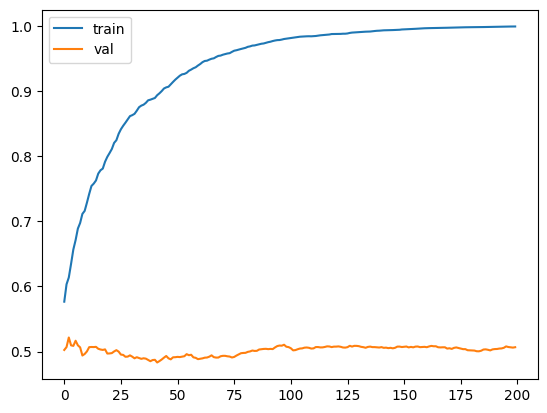

In [112]:
plt.plot(scores_xgb.iter_num, scores_xgb.train_auc, label='train')
plt.plot(scores_xgb.iter_num, scores_xgb.val_auc, label='val')
plt.legend()
plt.show()

### XGBoost Parameter Tuning

- `eta`

In [113]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

In [114]:
%%capture output
scores = {}

for e in learning_rates:
    xgb_params = {
        'eta': e,
        'max_depth': 4,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 2,
        'seed': 1,
        'verbosity': 1
    }
    
    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                     evals = watchlist)
    key = 'eta=%s' % (xgb_params['eta'])
    scores[key] = parse_xgb_output(output)

In [115]:
scores.keys()

dict_keys(['eta=0.001', 'eta=0.005', 'eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.5', 'eta=1'])

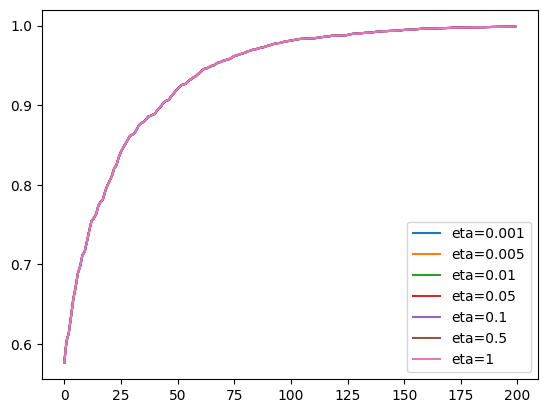

In [116]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.train_auc, label=key)
plt.legend()
plt.show()

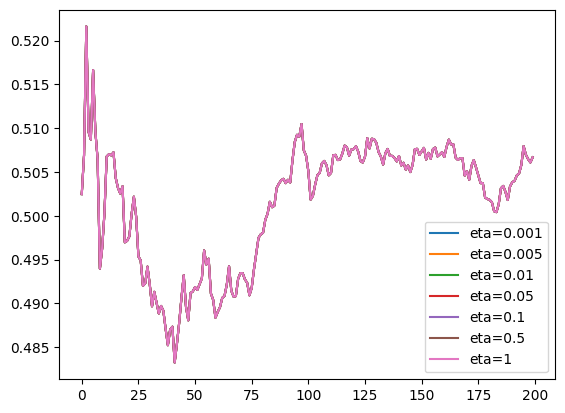

In [117]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=key)
plt.legend()
plt.show()

As there is no significant change in performance among different learning rates, we can select 0.1 as a learning rate, which is neither too slow nor too fast.

- `max_depth`

In [118]:
scores = {}

In [119]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 evals = watchlist)

In [120]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

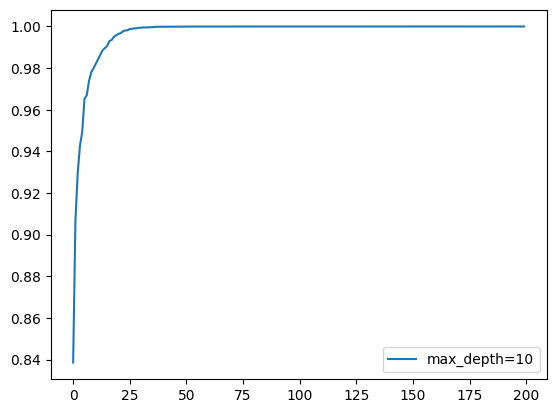

In [121]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.train_auc, label=key)
plt.legend()
plt.show()

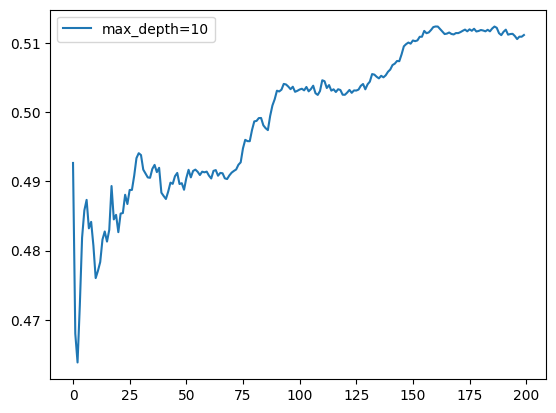

In [122]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=key)
plt.legend()
plt.show()

It looks like at `max_depth=3`, the training auc is not too high while the validation auc is within acceptable ranges. However, to get a better picture, we can limit the boost rounds to 25 as the model reaches its peak within 25 rounds.

In [123]:
%%capture output
scores = {}

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=25,
                 evals = watchlist)

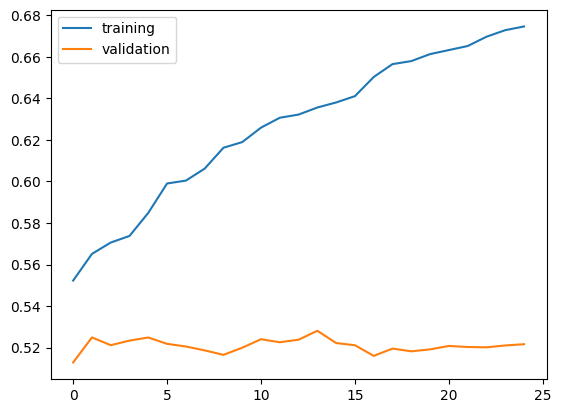

In [124]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.train_auc, label='training')
    plt.plot(df_score.iter_num, df_score.val_auc, label='validation')
plt.legend()
plt.show()

It looks like at boost_rounds=13, we get the best validation_auc score.

- `min_child_weight`

In [125]:
scores = {}

In [126]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=20,
                 evals = watchlist)

In [127]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

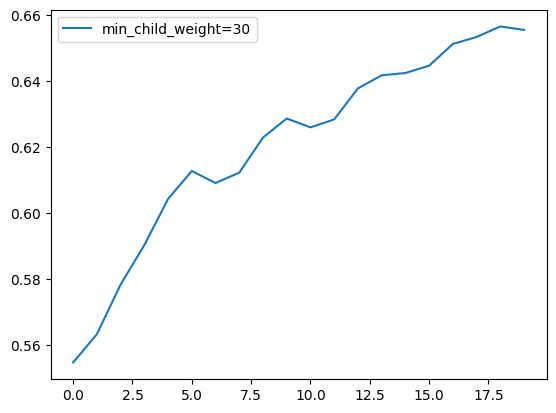

In [128]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.train_auc, label=key)
plt.legend()
plt.show()

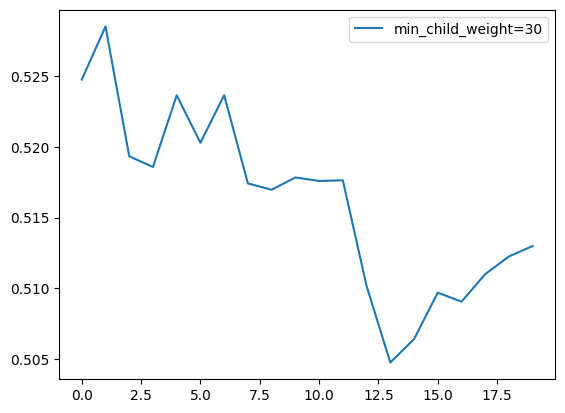

In [129]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=key)
plt.legend()
plt.show()

`min_child_weights=1` can be used with `num_boost_round=13` and `max_depth=3`

```python
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=13)
```

In [130]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=13)

In [131]:
y_pred = model.predict(dtrain)
auc_train = roc_auc_score(y_train, y_pred)
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
score['xgb']=auc
print(f"Train AUC: {auc_train}, Val AUC: {auc}")

Train AUC: 0.6322035834299526, Val AUC: 0.523813313842953


## Cross Validation

In [176]:
def train(df_train, y_train, model):
    dicts = df_train[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model.fit(X_train, y_train)
    return dv, model

In [177]:
def predict(df_val, dv, model):
    dicts = df_val[categorical+numerical].to_dict(orient='records')
    X_val = dv.transform(dicts)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

- `Logistic Regression`

In [178]:
lr = LogisticRegression(C=0.001, solver='newton-cholesky', penalty='l2', max_iter=10)

In [188]:
scores_cv = []
df_full = df_full_train.copy()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full.iloc[train_idx]
    df_val = df_full.iloc[val_idx]

    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values

    # display(df_train.columns)
    # display(df_val.columns)
    
    del df_train['heart_attack_risk']
    del df_val['heart_attack_risk']
    
    dv, model = train(df_train, y_train, lr)
    
    y_pred = predict(df_train, dv, lr)
    auc_train = roc_auc_score(y_train, y_pred)

    y_pred = predict(df_val, dv, lr)
    auc_val = roc_auc_score(y_val, y_pred)
    
    scores_cv.append((auc_train, auc_val))

df_scores_cv = pd.DataFrame(scores_cv, columns = ['Train_AUC', 'Val_AUC'])
print(f"Train: {df_scores_cv.Train_AUC.mean()} +- {df_scores_cv.Train_AUC.std()}")
print(f"Val: {df_scores_cv.Val_AUC.mean()} +- {df_scores_cv.Val_AUC.std()}")

Train: 0.5395241195732233 +- 0.0017599237228695483
Val: 0.5009552937990629 +- 0.016571129999341072


- `Decision Trees`

In [186]:
dt = DecisionTreeClassifier(criterion='gini',
                       max_depth=4,
                       min_samples_leaf=15,
                       random_state=12)

In [189]:
scores_cv = []
df_full = df_full_train.copy()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full.iloc[train_idx]
    df_val = df_full.iloc[val_idx]

    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values
    
    del df_train['heart_attack_risk']
    del df_val['heart_attack_risk']
    
    dv, model = train(df_train, y_train, dt)
    
    y_pred = predict(df_train, dv, dt)
    auc_train = roc_auc_score(y_train, y_pred)

    y_pred = predict(df_val, dv, dt)
    auc_val = roc_auc_score(y_val, y_pred)
    
    scores_cv.append((auc_train, auc_val))

df_scores_cv = pd.DataFrame(scores_cv, columns = ['Train_AUC', 'Val_AUC'])
print(f"Train: {df_scores_cv.Train_AUC.mean()} +- {df_scores_cv.Train_AUC.std()}")
print(f"Val: {df_scores_cv.Val_AUC.mean()} +- {df_scores_cv.Val_AUC.std()}")

Train: 0.5640882918500479 +- 0.014582789695766145
Val: 0.4970821604724825 +- 0.02790476923391444


- `Random Forest`

In [191]:
rf = RandomForestClassifier(n_estimators=9, 
                            max_depth=2,
                            min_samples_leaf=20,
                            max_features=35,
                            random_state=1)

In [192]:
scores_cv = []
df_full = df_full_train.copy()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full.iloc[train_idx]
    df_val = df_full.iloc[val_idx]

    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values
    
    del df_train['heart_attack_risk']
    del df_val['heart_attack_risk']
    
    dv, model = train(df_train, y_train, rf)
    
    y_pred = predict(df_train, dv, rf)
    auc_train = roc_auc_score(y_train, y_pred)

    y_pred = predict(df_val, dv, rf)
    auc_val = roc_auc_score(y_val, y_pred)
    
    scores_cv.append((auc_train, auc_val))

df_scores_cv = pd.DataFrame(scores_cv, columns = ['Train_AUC', 'Val_AUC'])
print(f"Train: {df_scores_cv.Train_AUC.mean()} +- {df_scores_cv.Train_AUC.std()}")
print(f"Val: {df_scores_cv.Val_AUC.mean()} +- {df_scores_cv.Val_AUC.std()}")

Train: 0.5681904721322892 +- 0.003627594413110045
Val: 0.4908221799007875 +- 0.02119065114958272


- `XGBoost`

In [193]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 2,
    'seed': 1,
    'verbosity': 1
}

In [196]:
scores_cv = []
df_full = df_full_train.copy()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full.iloc[train_idx]
    df_val = df_full.iloc[val_idx]

    y_train = df_train.heart_attack_risk.values
    y_val = df_val.heart_attack_risk.values
    
    del df_train['heart_attack_risk']
    del df_val['heart_attack_risk']

    dv = DictVectorizer(sparse=False)
    
    dicts_train = df_train[categorical+numerical].to_dict(orient='records')
    X_train = dv.fit_transform(dicts_train)

    dicts_val = df_val[categorical+numerical].to_dict(orient='records')
    X_val = dv.transform(dicts_val)

    dtrain = xgb.DMatrix(X_train, label=y_train,
                   feature_names=list(dv.get_feature_names_out()))

    dval = xgb.DMatrix(X_val, 
                    feature_names=list(dv.get_feature_names_out()))

    model = xgb.train(xgb_params, dtrain, num_boost_round=13)
    
    y_pred = model.predict(dtrain)
    auc_train = roc_auc_score(y_train, y_pred)

    y_pred = model.predict(dval)
    auc_val = roc_auc_score(y_val, y_pred)
    
    scores_cv.append((auc_train, auc_val))

df_scores_cv = pd.DataFrame(scores_cv, columns = ['Train_AUC', 'Val_AUC'])
print(f"Train: {df_scores_cv.Train_AUC.mean()} +- {df_scores_cv.Train_AUC.std()}")
print(f"Val: {df_scores_cv.Val_AUC.mean()} +- {df_scores_cv.Val_AUC.std()}")

Train: 0.6327506157161281 +- 0.00657199374919374
Val: 0.49232868436779914 +- 0.02275767756152874


## Selecting the best Model

From the cross validation sets we can see that of the four sets of models, `Logistic Regression` performs the best on validation sets with the least Standard Deviation, which implies better generalization.

Hence, we select `Logistic Regression` as the final model.

```python
LogisticRegression(C=0.001, solver='newton-cholesky', penalty='l2', max_iter=10)
```